In [1]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Read all data from the nodes and edges file saved by build_network.py

In [2]:
def SaveDataToDF(f):
    myData = []
    myDataNames = []
    def saveDat(item):
        if 'Data' in str(f[item].id):
            data2use = f[item][()]
            if data2use.ndim == 2:#some groups have multiple columns and this messes up the translation to a df at the end of this function
                [a,b] = data2use.shape
                for col in np.arange(0,b):
                    myData.append(data2use[:,col])
                    dataName = (f[item].name).split('/')[-1] + str(col)
                    myDataNames.append(dataName)
            else:
                myData.append(f[item][()])
                dataName = (f[item].name).split('/')[-1]
                myDataNames.append(dataName)
        
    f.visit(saveDat)
    allData = pd.DataFrame(myData).T
    allData.columns = myDataNames
    f.close()
    return allData

In [3]:
pathname = 'network'

In [4]:
f = h5py.File(os.path.join(pathname,'biophysical_biophysical_edges.h5'), 'r')
edgesDF = SaveDataToDF(f) 
f = h5py.File(os.path.join(pathname,'biophysical_nodes.h5'), 'r')
nodesDF = SaveDataToDF(f)

# using bmtools

In [9]:
cmd = 'bmtools plot --config simulation_configLFP.json positions'

In [17]:
cmd = 'bmtools plot --config simulation_configLFP.json  connection total'

In [18]:
cmd = 'bmtools plot --config simulation_configLFP.json  connection --sids pop_name --tids pop_name total'

In [22]:
node_types = pd.read_csv(os.path.join('network','biophysical_node_types.csv'))

In [21]:
nodeNames = ['AAC_SO','OLM_SO','PV_SO','Pyr_SP','AAC_SP','PV_SP','AAC_SR','PV_SR']

In [31]:
node_types.iloc[1]

node_type_id model_template pop_name model_type rotation_angle_zaxis morphology mem_potential    101 hoc:olmcell OLM biophysical 1.570796326794...
Name: 1, dtype: object

# change the node ids to node names

In [34]:
cellLocations = pd.read_csv('cell_locations.csv')
idNames = np.unique(nodesDF['node_type_id'])
cellNames = np.unique(cellLocations['Cell type'])
array = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
cellNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear
nodesDF = nodesDF.replace({'node_type_id':idNames},{'node_type_id':cellNames})

In [35]:
import plotly.express as px
fig = px.scatter_3d(nodesDF,x ='positions0', y='positions1', z='positions2',
                    color = 'node_type_id',
                    opacity = 0.7)
fig.update_traces(marker_size = 6)
fig.write_html('networkNodes2.html',auto_open=True)

# plot nodes edges - wip

In [ ]:
#find the node source id and get its position, then find the destination node id, and get its position
#there will be a -1 x 6 array of the source to target connections

In [315]:
xlocofEdgeSource = nodesDF['positions0'][np.array(edgesDF['source_node_id'])]
YlocofEdgeSource = nodesDF['positions1'][np.array(edgesDF['source_node_id'])]
ZlocofEdgeSource = nodesDF['positions2'][np.array(edgesDF['source_node_id'])]
xlocofEdgedest = nodesDF['positions0'][np.array(edgesDF['target_node_id'])]
YlocofEdgedest = nodesDF['positions1'][np.array(edgesDF['target_node_id'])]
ZlocofEdgedest = nodesDF['positions2'][np.array(edgesDF['target_node_id'])]
locsList = [xlocofEdgeSource,YlocofEdgeSource,ZlocofEdgeSource,xlocofEdgedest,YlocofEdgedest,ZlocofEdgedest]
locsList = [np.array(item).reshape(1,-1) for item in locsList]
df = pd.DataFrame(np.concatenate(locsList)).T
fig = px.line_3d(df, x=0, y=1,z=2)
fig.write_html('testfig.html',auto_open=True)


In [316]:
source,dest = np.array(edgesDF['source_node_id']),np.array(edgesDF['target_node_id'])
pairs = np.vstack((source,dest)).T
pairs = pairs.astype(int)
X,Y,Z = np.array(nodesDF['positions0']),np.array(nodesDF['positions1']),np.array(nodesDF['positions2'])

In [317]:
import plotly.graph_objects as go
x_lines = []
y_lines = []
z_lines = []
nameList = list(set(nodesDF['node_type_id']))

#create the coordinate list for the lines
for p in pairs:
    for i in range(2):
        x_lines.append(X[p[i]])
        y_lines.append(Y[p[i]])
        z_lines.append(Z[p[i]])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)

trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='lines'
)

Name2Use = nameList[0]
trace1 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)
Name2Use = nameList[1]
trace3 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)
Name2Use = nameList[2]
trace4 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[3]
trace5 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[4]
trace6 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[5]
trace7 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[6]
trace8 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)

Name2Use = nameList[7]
trace9 = go.Scatter3d(
    x = np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions0']),
    y=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions1']),
    z=np.array(nodesDF[nodesDF['node_type_id'] == Name2Use]['positions2']),
    mode='markers',
    name = Name2Use
    
)



figlines = go.Figure(data=[trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9])


In [372]:
figlines.write_html('testfig.html',auto_open=True)

### construct adjacency matrix of the directed graph

In [ ]:
# nxn nodeids
#each row is the number of outgoing connections to nodeids in the columns

In [15]:
targetIDs = np.array(edgesDF['target_node_id'])
sourceIDs = np.array(edgesDF['source_node_id'])
source2targetIDs = pd.DataFrame(np.vstack((sourceIDs,targetIDs))).T
source2targetIDs.columns = ['source','target']
df = source2targetIDs
nodeArray = np.array(df)# nice to have a df for viewing and array for computing

In [16]:
#get the counts of source to target

In [17]:
IDS = np.arange(0,len(np.unique(df['source'])))
adj = np.zeros((len(IDS),len(IDS)))#nxn matrix


In [18]:
for i in range(0,len(IDS)):
    idxs = nodeArray[nodeArray[:,0]==i][:,1]#grab the targets for which the source id is i...
    #add something for checking unique, or rate of messages, or something to add as the values instead of just 1 for a connection.
    adj[i][idxs.astype(int)] = 1#... and place a 1 in that location. ideally this is the count of connections to this target, but for now it is only 1 connection in the model

In [23]:
np.save('adjacencyMatrix',adj)

# use the adjacency matrix to calculate summary statistics about the network

In [7]:
import networkx as nx

In [6]:
adj = np.load('adjacencyMatrix.npy')
cellLocations = pd.read_csv('cell_locations.csv')


In [131]:
#get a list of the layer names in order of 
layerList = cellLocations['Cell type']
idxs = np.unique(cellLocations['Cell type'],return_index=True)[1]
layerNames = [array[index] for index in sorted(idxs)]#use the names in the order in which the id's appear


In [68]:
# first get a df of the cell layers and their index boundaries

In [41]:
def getSectionBeginEnd(layerNames,name):
    group = np.where(layerNames == name)[0]
    begin = group[0]
    end = group[len(group)-1]
    return begin,end

In [141]:
starts,ends = [], []

nameSet = list(set(layerNames))
for name in layerNames:
    begin, end = getSectionBeginEnd(layerList,name)
    starts.append(begin)
    ends.append(end)


In [142]:
df1 = pd.DataFrame(starts,index = nameSet, columns = ['start'])
df2 = pd.DataFrame(ends,index = nameSet, columns = ['end'])
layerIdxsDF = pd.concat([df1,df2],axis=1)
layerIdxsDF

,start,end
AAC in SP layer,0,34
Pyr in SP layer,35,198
AAC in SO layer,199,330
PV in SO layer,331,31480
OLM in SO layer,31481,31583
PV in SR layer,31584,31971
PV in SP layer,31972,31980
AAC in SR layer,31981,32013


In [78]:
G = nx.from_numpy_array(adj,create_using=nx.DiGraph)#directed graph of the network, recall rows are senders, columns are recievers

In [237]:
def groupSumStats(G,IDS):
    out_degree_centrality = nx.group_out_degree_centrality(G,IDS)
    in_degree_centrality = nx.group_in_degree_centrality(G,IDS)
    clusterDict = nx.clustering(G, IDS)
    avgClustering = np.mean([clusterDict[key] for key in clusterDict])
    return [in_degree_centrality,out_degree_centrality,avgClustering]

In [209]:
def calcNetStats(G,layerList,layerNames):
    AllStats = []
    for name in layerNames:
        IDS = np.where(layerList == name)[0]
        AllStats.append(groupSumStats(G,IDS))
    return AllStats

In [238]:
netStats = calcNetStats(G,layerList,layerNames)

[0, 13732, 4]


In [242]:
results.to_csv('networkStats.csv')

In [175]:
# make a dataframe with rows are layer names, and columns with the given metric's summary stats

In [241]:

netStatNames = ["inDeg_cent","outDeg_cent","avgClustering"]
results = pd.DataFrame(netStats,columns = netStatNames,index = layerNames)
results

,inDeg_cent,outDeg_cent,avgClustering
AAC in SO layer,0.176178,0.712812,0.002812
OLM in SO layer,0.977991,0.998619,0.001232
PV in SO layer,0.817013,0.969418,0.005264
Pyr in SP layer,1.000000,1.000000,0.057975
AAC in SP layer,0.450158,0.960014,0.002537
PV in SP layer,0.986688,0.994720,0.005061
AAC in SR layer,0.054460,0.290267,0.002830
PV in SR layer,0.353960,0.608955,0.005015


In [240]:
#other metrics to explore:
print(nx.shortest_path(G, source=0, target=4))

[0, 13732, 4]


In [114]:
test.index

RangeIndex(start=0, stop=1, step=1)

In [ ]:
#just get the indices of the layer ranges, and comput the sum stats over that in the adj matrix

In [42]:
np.where(cent==max(cent))

(array([93], dtype=int64),)

In [46]:
layerNames[np.where(cent==max(cent))[0]]

93    OLM in SO layer
Name: node_type_id, dtype: object

In [29]:
adjacencyDF = pd.DataFrame(adj,columns = IDS,index=IDS)

32014

import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd# model output results

# plotting spike outputs

In [319]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [320]:
outpath = 'output'

In [321]:
f = h5py.File(os.path.join(outpath,'spikes.h5'), 'r')
spikesDF = SaveDataToDF(f) 

In [322]:
spikesDF

,node_ids,timestamps
0,32.0,11.6
1,33.0,12.3
2,37.0,1.3
3,37.0,3.9
4,37.0,7.9
5,37.0,11.7
6,38.0,0.7
7,38.0,3.3
8,38.0,7.3
9,38.0,11.1


In [369]:
f = h5py.File(os.path.join('output','v_report.h5'), 'r')
traces = f['report/biophysical/data'][()]
f.close()

array([32, 33, 37, 38])

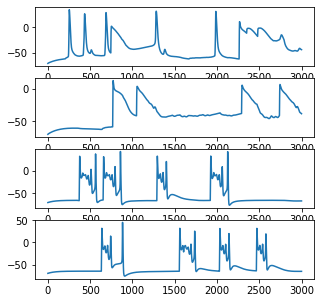

In [371]:
spikingCellIDs = np.unique(np.array(spikesDF['node_ids'],dtype=int))

fig,ax = plt.subplots(len(spikingCellIDs),figsize=(5,5))
i = 0
for cell in spikingCellIDs:
    ax[i].plot(traces[:,cell])
    i+=1
spikingCellIDs


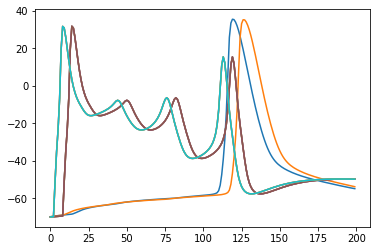

In [333]:
plt.plot(traces[:,np.array(spikesDF['node_ids'],dtype=int)][:200])
plt.show()

In [326]:
f = h5py.File('network/bgpn_nodes.h5', 'r')
bgNodes = SaveDataToDF(f)
bgNodes

,node_group_id,node_group_index,node_id,node_type_id
0,0,0,0,100
1,0,1,1,100
2,0,2,2,100
3,0,3,3,100
4,0,4,4,100
...,...,...,...,...
75,0,75,75,100
76,0,76,76,100
77,0,77,77,100
78,0,78,78,100


In [327]:
f = h5py.File('network/bgpn_biophysical_edges.h5', 'r')
bgEdges = SaveDataToDF(f)


In [328]:
bgEdges

,nsyns,edge_group_id,edge_group_index,edge_type_id,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,node_id_to_range0,node_id_to_range1,range_to_edge_id0,range_to_edge_id1,source_node_id,target_node_id
0,1,0,0,100,0,1,0,1,0,1,0,1,0,0
1,1,0,1,100,1,2,1,2,1,2,1,2,1,1
2,1,0,2,100,2,3,2,3,2,3,2,3,2,2
3,1,0,3,100,3,4,3,4,3,4,3,4,3,3
4,1,0,4,100,4,5,4,5,4,5,4,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,75,100,75,76,75,76,75,76,75,76,75,75
76,1,0,76,100,76,77,76,77,76,77,76,77,76,76
77,1,0,77,100,77,78,77,78,77,78,77,78,77,77
78,1,0,78,100,78,79,78,79,78,79,78,79,78,78


In [366]:
f = h5py.File('CA1_inputs/bg_pn_spikes.h5', 'r')
bgInputs = SaveDataToDF(f)
bgInputs

,node_ids,timestamps
0,0.0,37.330396
1,0.0,95.139901
2,0.0,185.435109
3,0.0,238.467024
4,0.0,240.353257
...,...,...
470,78.0,151.886019
471,78.0,277.615241
472,78.0,293.461232
473,79.0,33.728859


In [365]:
psg = PoissonSpikeGenerator(population='bgpn',
       seed=222)

psg.add(node_ids=range(0,80),  # need same number as cells
        firing_rate=20,    # 1 spike every 5 seconds Hz
        times=(0, 300/1000))

psg.to_dataframe()

,node_ids,timestamps,population
0,0,37.330396,bgpn
1,0,95.139901,bgpn
2,0,185.435109,bgpn
3,0,238.467024,bgpn
4,0,240.353257,bgpn
...,...,...,...
470,78,151.886019,bgpn
471,78,277.615241,bgpn
472,78,293.461232,bgpn
473,79,33.728859,bgpn


In [346]:
dir(psg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_fixed_fr',
 '_build_inhomegeous_fr',
 'adaptor',
 'add',
 'from_csv',
 'from_nwb',
 'from_sonata',
 'load',
 'max_spikes_per_node',
 'time_range']

# ECP plotting

In [36]:
data.shape

(3000, 13)

In [375]:
f = h5py.File('output\ecp.h5', 'r')
data = f['ecp/data'][()]
time = f['ecp/time'][()]
f.close()

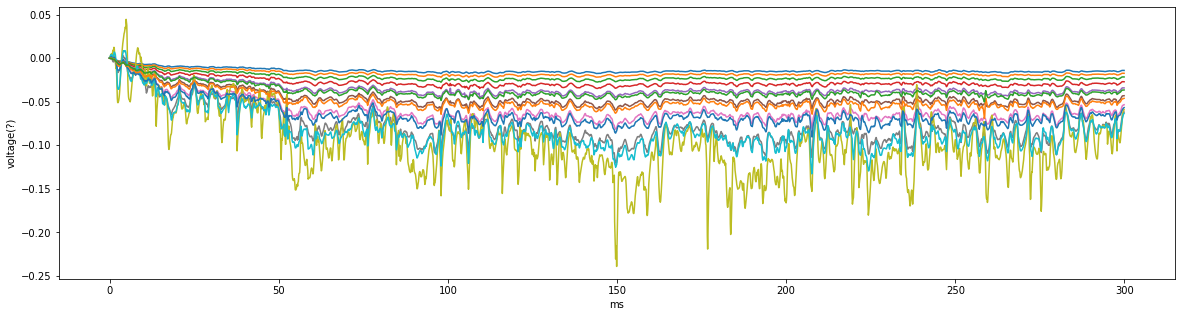

In [377]:
start,end = 0, 3000
plt.figure(figsize=(20,5))
plt.plot(np.arange(time[0],time[1],time[2])[start:end],data[start:end])
plt.xlabel('ms')
plt.ylabel('voltage(?)')
#plt.savefig('ecp.png',dpi=400,background='w')
plt.show()

In [212]:
len(data)

3000

In [209]:
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [343]:
mdat = np.mean(data,axis=1)

In [344]:

f, Pxx_den = signal.periodogram(mdat,fs)


In [340]:
Pxx_den.shape

(1501,)

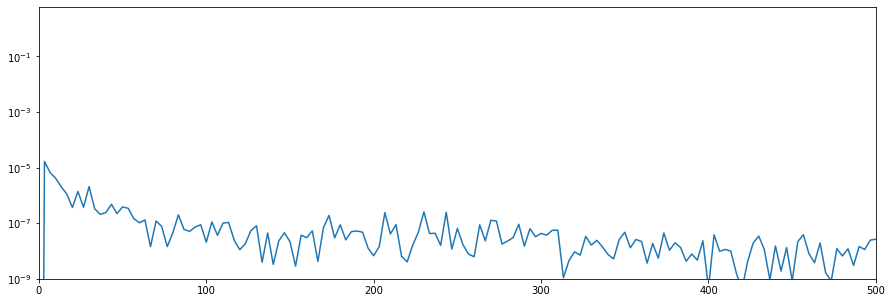

In [379]:
fs = 10000 
f, Pxx_den = signal.periodogram(mdat, fs)
plt.figure(figsize=(15,5))
plt.semilogy(f, Pxx_den)
plt.xlim([0,500])
plt.ylim([10e-10,10-4])
plt.show()

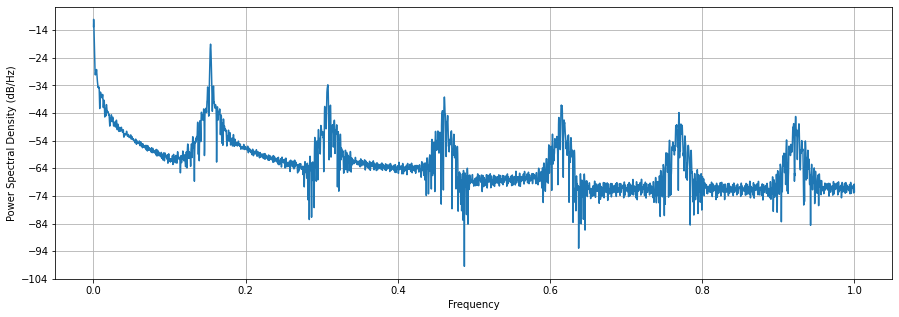

In [301]:
plt.figure(figsize=(15,5))
Pxx,freqs = plt.psd(data,NFFT = fs,noverlap=True)

In [348]:
f = h5py.File(os.path.join("output",'v_report.h5'), 'r')
vreports = SaveDataToDF(f) 

'AAC in SO layer'

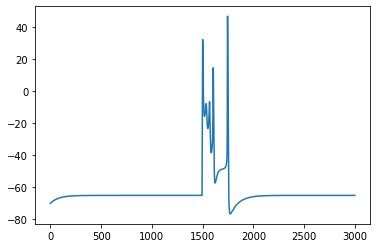

In [373]:
plt.plot(vreports['data0'])
nodesDF['node_type_id'][0]

'OLM in SO layer'

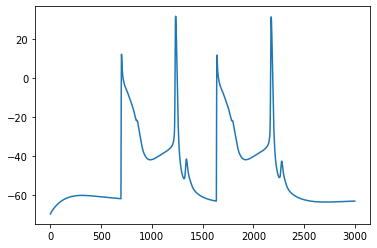

In [366]:
plt.plot(vreports['data5'])
nodesDF['node_type_id'][5]

'OLM in SO layer'

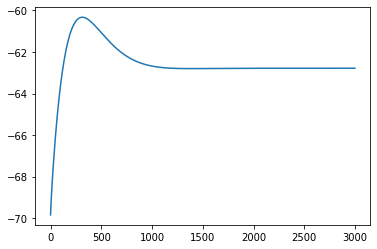

In [367]:
plt.plot(vreports['data13'])
nodesDF['node_type_id'][13]

'Pyr in SP layer'

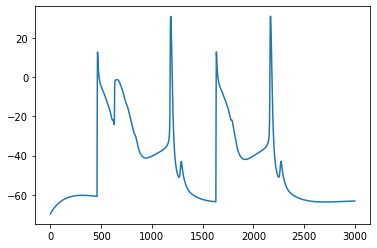

In [371]:
plt.plot(vreports['data138'])
nodesDF['node_type_id'][138]

In [55]:
from scipy.signal import butter, lfilter, resample, filtfilt
from scipy.stats import zscore
from scipy.fft import fft, fftfreq, fftshift

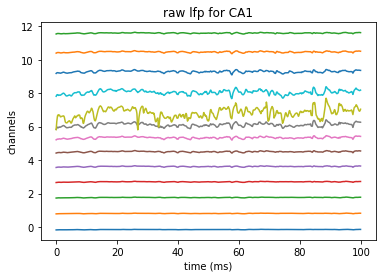

In [40]:
tsim = 300
lfp_file = "output/ecp.h5"
f = h5py.File(lfp_file,'r')
lfp = list(f['ecp']['data'])
lfp_arr = np.asarray(lfp)
lfp = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for i in range(13):
    lfp[i] = lfp_arr[:,i]
    lfp[i] = [(x*10)+i for x in lfp[i]]
    temp = lfp[i]
    temp = temp[1500:2500]
    plt.plot(np.arange(0,100,0.1),temp)
plt.xlabel('time (ms)')
plt.ylabel('channels')
plt.title("raw lfp for CA1")
plt.show()

In [42]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

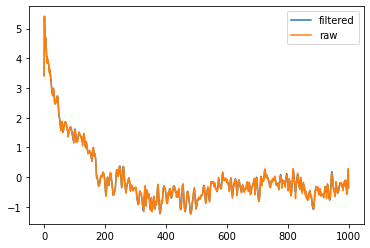

In [47]:
# Filter requirements.
order = 6
fs = 10000       # sample rate, Hz
cutoff = 500  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
data=lfp[0]

y = butter_lowpass_filter(data, cutoff, fs, order)
filtered= resample(y, 1000)
filtered = zscore(filtered)

data = resample(data, 1000)
raw = zscore(data)

plt.plot(np.arange(0,1000, 1), filtered, label='filtered')
plt.plot(np.arange(0,1000, 1), raw, label='raw')

plt.legend()
plt.show()

In [52]:
t = np.arange(len(filtered))

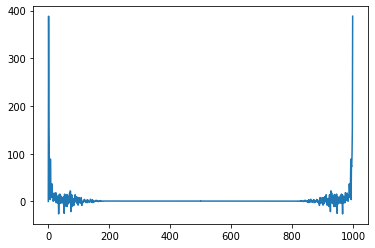

In [53]:
fftRes = scipy.fft.fft(filtered)
plt.plot(t,fftRes.real)

In [113]:
hist, bin_edges = np.histogram(fftRes.real/max(fftRes.real), bins=200)

In [57]:

sp = fftshift(fft(filtered))
freq = fftshift(fftfreq(t.shape[-1]))

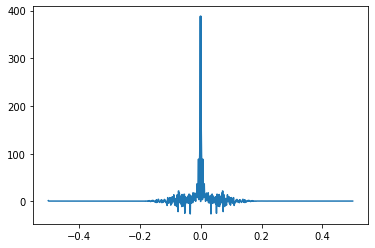

In [68]:
plt.plot(freq,sp.real)

In [201]:
nonzeros = np.array([r for r in fftRes if r != 0])

In [122]:
hist, bin_edges = np.histogram(fftRes.real,bins=200)

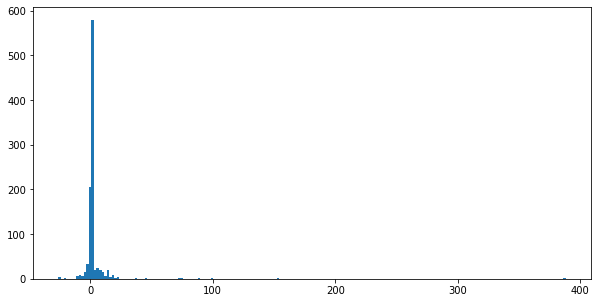

In [203]:
plt.figure(figsize=(10,5))
plt.hist(nonzeros.real,bins=200)
plt.show()

# TESTING

In [336]:
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

In [30]:
psg = PoissonSpikeGenerator(population='bgpn')

psg.add(node_ids=1,  # need same number as cells
        firing_rate=50000,    # 1 spike every 5 seconds Hz
        times=(1/1000, 2/1000))  # time is in seconds for some reason


In [21]:
psg.to_sonata('CA1_inputs/bg_pn_spikes.h5')

In [31]:
print('Number of spikes: {}'.format(psg.n_spikes()))
print('Units: {}'.format(psg.units()))

psg.to_dataframe()

Number of spikes: 52
Units: ms


,node_ids,timestamps,population
0,1,1.054939,bgpn
1,1,1.063110,bgpn
2,1,1.106914,bgpn
3,1,1.144070,bgpn
4,1,1.155733,bgpn
5,1,1.193693,bgpn
6,1,1.194066,bgpn
7,1,1.198494,bgpn
8,1,1.210716,bgpn
9,1,1.216851,bgpn


In [30]:
tst = psg.to_dataframe()
tst.iloc[10]

node_ids              1
timestamps    19.309215
population         bgpn
Name: 10, dtype: object

In [32]:
pathname = 'CA1_inputs'
f = h5py.File(os.path.join(pathname,'bg_pn_spikes.h5'), 'r')
f.visit(print)

spikes
spikes/bgpn
spikes/bgpn/node_ids
spikes/bgpn/timestamps


In [37]:
tst = SaveDataToDF(f)

In [44]:
tst.head(20)

,node_ids,timestamps
0,0.0,81.784365
1,0.0,93.590084
2,0.0,139.894619
3,0.0,144.310465
4,0.0,147.109625
5,0.0,159.124039
6,0.0,159.366370
7,0.0,180.782293
8,0.0,186.320028
9,1.0,3.910261


In [3]:
f['spikes/bgpn//node_ids'][()]

array([ 1,  7,  7,  7,  8,  9, 10, 12, 15, 15, 16, 18, 19, 23, 23, 29, 29,
       29, 30, 30, 34, 38, 46, 52, 53, 54, 55, 57, 57, 60, 62, 62, 63],
      dtype=int64)

In [40]:
dir(psg)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_fixed_fr',
 '_build_inhomegeous_fr',
 'adaptor',
 'add',
 'from_csv',
 'from_nwb',
 'from_sonata',
 'load',
 'max_spikes_per_node',
 'time_range']

In [41]:
psg.time_range()

(200.10935571208424, 295.10472372879343)

In [124]:
f.close()

In [20]:
psg.to_csv('CA1_inputs/bg_pn_spikes.txt')

In [3]:
pathname = 'CA1_inputs'

In [24]:
tst = np.loadtxt('CA1_inputs/bg_pn_spikes.txt')

ValueError: could not convert string to float: 'timestamps'

In [6]:
tst = pd.read_csv('CA1_inputs/bg_pn_spikes.txt')
test = np.array(tst)

In [7]:
with h5py.File('bg_pn_spikes.hdf5','w') as f:
    f['bg_pn'] = test


In [5]:
f = h5py.File(os.path.join(pathname,'bg_pn_spikes.hdf5'), 'r')
f.visit(print)

dataset


# run testing

In [428]:
import random
#from bmtk.builder import NetworkBuild
seed = 999
random.seed(seed)
np.random.seed(seed)

#net = NetworkBuilder("biophysical")
# amount of cells
numAAC = 50  # 147
numCCK = 10  # 360
numNGF = 10  # 580
numOLM = 10 # 164
numPV = 10  # 553
numPyr = 10  # 31150

# arrays for cell location csv
cell_name = []
cell_x = []
cell_y = []
cell_z = []
# amount of cells per layer
numAAC_inSO = int(round(numAAC*0.238))
numAAC_inSP = int(round(numAAC*0.7))
numAAC_inSR = int(round(numAAC*0.062))
numCCK_inSO = int(round(numCCK*0.217))
numCCK_inSP = int(round(numCCK*0.261))
numCCK_inSR = int(round(numCCK*0.325))
numCCK_inSLM = int(round(numCCK*0.197))
numNGF_inSR = int(round(numNGF*0.17))
numNGF_inSLM = int(round(numNGF*0.83))
numPV_inSO = int(round(numPV*0.238))
numPV_inSP = int(round(numPV*0.701))
numPV_inSR = int(round(numPV*0.0596))

totalCellNum = numAAC_inSO + numAAC_inSP + numAAC_inSR + numCCK_inSO + numCCK_inSP + numCCK_inSR + numCCK_inSLM + numNGF_inSR + numNGF_inSLM + numPV_inSO + numPV_inSP + numPV_inSR


# total 400x1000x450
# Order from top to bottom is SO,SP,SR,SLM total
# SO layer
xside_length = 400; yside_length = 1000; height = 450; min_dist = 20
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(320, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SO = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# SP layer
xside_length = 400; yside_length = 1000; height = 320; min_dist = 8
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(290, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SP = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# SR
xside_length = 400; yside_length = 1000; height = 290; min_dist = 20
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(80, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SR = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# SLM
xside_length = 400; yside_length = 1000; height = 79; min_dist = 20
x_grid = np.arange(0, xside_length+min_dist, min_dist)
y_grid = np.arange(0, yside_length+min_dist, min_dist)
z_grid = np.arange(0, height+min_dist, min_dist)
xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
pos_list_SLM = np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T

# ############ SO LAYER ############ #
# AAC
# Pick location
inds = np.random.choice(np.arange(0, np.size(pos_list_SO, 0)), numAAC_inSO, replace=False)
pos = pos_list_SO[inds, :]



In [429]:
inds

array([4018, 7531, 2256, 1764, 7771, 1294, 7433, 4930, 1049, 8500, 7073,
       3594])

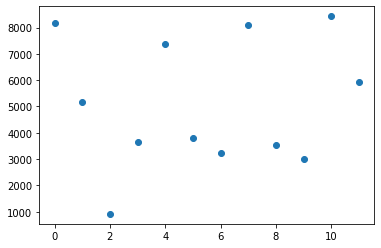

In [461]:
plt.scatter(np.arange(0,len(inds)),inds)

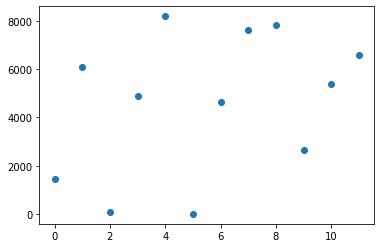

In [460]:
plt.scatter(np.arange(0,len(Idxs)),Idxs)

In [436]:
np.size(pos_list_SO, 0)

8568

In [437]:
pos_list_SO.shape[0]

8568

In [467]:
rng = np.random.default_rng(999)
Idxs = rng.choice(np.arange(0, pos_list_SO.shape[0]), numAAC_inSO, replace=False)

In [455]:
inds = np.random.choice(np.arange(0, np.size(pos_list_SO, 0)), numAAC_inSO, replace=False)
pos = pos_list_SO[inds, :]

In [468]:
Idxs

array([1465, 1491, 1448, 6425, 6964, 1474,  878, 1548, 6109, 1317, 7727,
       6665])

In [457]:
inds

array([8190, 5169,  919, 3644, 7372, 3808, 3216, 8096, 3523, 2994, 8429,
       5927])

In [458]:
np.std(inds)

2366.396385681542

In [459]:
np.std(Idxs)

2805.8984140061493

In [387]:
gParams = np.array([0,0,320,400,1000,450])
def make_layer_grid(xstart,ystart,zstart,x_length,y_length,z_length,min_dist):
    x_grid = np.arange(xstart, x_length+min_dist, min_dist)
    y_grid = np.arange(ystart, y_length+min_dist, min_dist)
    z_grid = np.arange(zstart, z_length+min_dist, min_dist)
    xx, yy, zz = np.meshgrid(x_grid, y_grid, z_grid)
    return np.vstack([xx.ravel(), yy.ravel(), zz.ravel()]).T
    

In [389]:
pos_list_SO_test = make_layer_grid(0,0,320,400,1000,450,20)

In [8]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:
import os, sys
from bmtk.simulator import bionet
import numpy as np
import synapses
import warnings
from bmtk.simulator.core import simulation_config
from bmtk.simulator.bionet.pyfunction_cache import add_weight_function

In [10]:
def gaussianBL(edge_props, source, target):
    w0 = edge_props["syn_weight"]
    sigma = edge_props["weight_sigma"]
    return np.random.normal(w0, sigma, 1)

def lognormal(edge_props, source, target):
    m = edge_props["syn_weight"]
    s = edge_props["weight_sigma"]
    mean = np.log(m) - 0.5 * np.log((s / m) ** 2 + 1)
    std = np.sqrt(np.log((s / m) ** 2 + 1))
    return np.random.lognormal(mean, std, 1)

In [11]:
synapses.load()

In [12]:
add_weight_function(lognormal)
add_weight_function(gaussianBL)

In [13]:
conf = bionet.Config.from_json('simulation_configLFP.json')

In [14]:
conf.build_env()

2022-06-09 14:34:28,707 [INFO] Created log file


In [19]:
graph = bionet.BioNetwork.from_config(conf)

In [22]:
from bmtk.builder.networks import NetworkBuilder

In [23]:
bgpn = NetworkBuilder('bgpn')
bgpn.add_nodes(
    N=10,
    pop_name='bgpn',
    potential='exc',
    model_type='virtual'
)

In [27]:
print(graph.get_node_set('all').population_names())

['biophysical']


In [9]:
pop = graph._node_populations['biophysical']
for node in pop.get_nodes():
    node._node._node_type_props['morphology'] = node.model_template[1]


In [10]:
cells = graph.get_local_cells()
for cell in cells:
    cells[cell].hobj.insert_mechs(cells[cell].gid)
    pass

In [11]:
sim = bionet.BioSimulator.from_config(conf, network=graph)

2022-06-09 14:23:15,434 [INFO] Building cells.
2022-06-09 14:23:15,722 [INFO] Building recurrent connections
2022-06-09 14:23:15,801 [INFO] Building virtual cell stimulations for bgpn


In [ ]:
cortex.add_nodes(
    cell_name='Scnn1a_473845048',
    potental='exc',
    model_type='biophysical',
    model_template='ctdb:Biophys1.hoc',
    model_processing='aibs_perisomatic',
    dynamics_params='472363762_fit.json',
    morphology='Scnn1a_473845048_m.swc'
)

In [ ]:
thalamus.add_nodes(
    N=100,
    pop_name='tON',
    potential='exc',
    model_type='virtual'
)

In [31]:
graph.add_nodes(tst)

AttributeError: 'DataFrame' object has no attribute 'name'

In [20]:
dir(graph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_cell',
 '_cells_built',
 '_components',
 '_connections_initialized',
 '_edge_adaptors',
 '_edge_populations',
 '_gap_juncs',
 '_gid_pool',
 '_init_connections',
 '_io',
 '_model_type_map',
 '_morphologies_cache',
 '_morphology_lookup',
 '_node_adaptors',
 '_node_populations',
 '_node_sets',
 '_rank_node_gids',
 '_rank_node_ids',
 '_rank_nodes_by_model',
 '_register_adaptors',
 '_remote_node_cache',
 '_virtual_nodes',
 'add_component',
 'add_edges',
 'add_node_set',
 'add_nodes',
 'add_spike_trains',
 'build',
 'build_nodes',
 'build_recurrent_edges',
 'build_virtual_connections',
 'calc_seg_coords',
 'cell_type_ma

In [20]:
graph._virtual_nodes

{}

In [19]:
dir(graph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_cell',
 '_cells_built',
 '_components',
 '_connections_initialized',
 '_edge_adaptors',
 '_edge_populations',
 '_gap_juncs',
 '_gid_pool',
 '_init_connections',
 '_io',
 '_model_type_map',
 '_morphologies_cache',
 '_morphology_lookup',
 '_node_adaptors',
 '_node_populations',
 '_node_sets',
 '_rank_node_gids',
 '_rank_node_ids',
 '_rank_nodes_by_model',
 '_register_adaptors',
 '_remote_node_cache',
 '_virtual_nodes',
 'add_component',
 'add_edges',
 'add_node_set',
 'add_nodes',
 'add_spike_trains',
 'build',
 'build_nodes',
 'build_recurrent_edges',
 'build_virtual_connections',
 'calc_seg_coords',
 'cell_type_ma

In [12]:
dir(sim)

['_BioSimulator__elapsed_time',
 '_BioSimulator__tstep_end_block',
 '_BioSimulator__tstep_start_block',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cell_variables',
 '_cell_vars_dir',
 '_celsius',
 '_f_iclamps',
 '_h',
 '_iclamps',
 '_log_file',
 '_nsteps_block',
 '_output_dir',
 '_seclamps',
 '_set_init_conditions',
 '_sim_mods',
 '_spikes',
 '_start_from_state',
 '_v_init',
 'add_mod',
 'attach_current_clamp',
 'attach_file_current_clamp',
 'attach_se_voltage_clamp',
 'biophysical_gids',
 'cell_var_output',
 'cell_variables',
 'celsius',
 'dt',
 'from_config',
 'h',
 'local_gids',
 'n_steps',
 'net',
 'nsteps',
 'nsteps_block',
 'post_fadvance',
 'report_load_b

In [122]:
sim.run()

2022-06-09 13:34:27,797 [INFO] Running simulation for 300.000 ms with the time step 0.100 ms
2022-06-09 13:34:27,798 [INFO] Starting timestep: 0 at t_sim: 0.000 ms
2022-06-09 13:34:27,799 [INFO] Block save every 3000 steps


ValueError: shapes (13,89) and (34,) not aligned: 89 (dim 1) != 34 (dim 0)

NEURON: PyObject method call failed: post_fadvance
 near line 0
 ^
        advance()
      step()
    continuerun(300)
  run(300)


RuntimeError: hoc error

In [14]:
dir(sim)

['_BioSimulator__elapsed_time',
 '_BioSimulator__tstep_end_block',
 '_BioSimulator__tstep_start_block',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cell_variables',
 '_cell_vars_dir',
 '_celsius',
 '_f_iclamps',
 '_h',
 '_iclamps',
 '_log_file',
 '_nsteps_block',
 '_output_dir',
 '_seclamps',
 '_set_init_conditions',
 '_sim_mods',
 '_spikes',
 '_start_from_state',
 '_v_init',
 'add_mod',
 'attach_current_clamp',
 'attach_file_current_clamp',
 'attach_se_voltage_clamp',
 'biophysical_gids',
 'cell_var_output',
 'cell_variables',
 'celsius',
 'dt',
 'from_config',
 'h',
 'local_gids',
 'n_steps',
 'net',
 'nsteps',
 'nsteps_block',
 'post_fadvance',
 'report_load_b